<a href="https://colab.research.google.com/github/artiagra/Board-Infinity/blob/master/Python_2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()


Saving playstore-analysis (2) (1).csv to playstore-analysis (2) (1) (1).csv


In [0]:
import io
import pandas as pd
train = pd.read_csv(io.BytesIO(uploaded['playstore-analysis (2) (1).csv']))

In [0]:
train.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [0]:
train.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [0]:
train.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [0]:
train.shape

(10841, 13)

Task 1

In [0]:
t = train.dropna(subset=['Rating'])

In [0]:
t.reset_index(inplace=True)



In [0]:
t.isnull().sum()

index             0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [0]:
t.shape

(9367, 14)

In [0]:
t.loc[t['Android Ver'].isnull()]

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4280,4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4308,4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
9117,10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Nope, 3rd record is very different from other two, seems garbage value

In [0]:
train = t.drop(9117)

In [0]:
train.loc[train['Android Ver'].isnull()]

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4280,4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4308,4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [0]:
train['Android Ver'].fillna('mode',inplace=True)

In [0]:
train['Android Ver'].isnull().sum()

0

In [0]:
train['Current Ver'].value_counts().head(1)

Varies with device    1415
Name: Current Ver, dtype: int64

In [0]:
train['Current Ver'].fillna('Varies with device',inplace=True)

In [0]:
train['Current Ver'].isnull().sum()

0

Task 2

In [0]:
train.dtypes

index               int64
App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [0]:
train.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Reviews, Installs, Price should be converted to numerical types

In [0]:
train['Price'] = [x.strip('$') for x in train['Price']]
train['Price'] = train['Price'].astype(float)

In [0]:
train['Price'].dtype

dtype('float64')

In [0]:
train['Installs'] = [x.strip('+') for x in train['Installs']]
train['Installs'] = train['Installs'].str.replace(',','')
train['Installs'] = train['Installs'].astype(int)

In [0]:
train['Installs'].dtype

dtype('int64')

In [0]:
train['Reviews'] = train['Reviews'].astype(int)

In [0]:
train['Reviews'].dtype

dtype('int64')

In [0]:
train.dtypes

index               int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Task 3

In [0]:
train['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

the minimum rating is 1 and maximum rating is 5, no need to drop

In [0]:
train.loc[train['Reviews']>train['Installs']]

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2342,2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4467,4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5539,5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6149,6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
6622,7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
7598,8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
9267,10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


There are 7 records with reviews greater than installs

In [0]:
index_list = train.loc[train['Reviews']>train['Installs']].index  #getting index of reviews>installs in a list

In [0]:
train.shape #shape before drop

(9366, 14)

In [0]:
train = train.drop(index_list) #dropping records where reviews greater than installs

In [0]:
train.shape #shape after drop

(9359, 14)

Task 4

In [0]:
train['Price'].value_counts()

0.00      8715
2.99       114
0.99       106
4.99        70
1.99        59
          ... 
299.99       1
1.59         1
1.61         1
3.90         1
2.90         1
Name: Price, Length: 73, dtype: int64

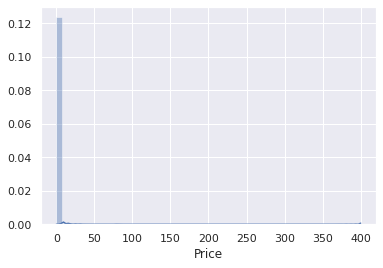

In [0]:
import seaborn as sns
sns.distplot(train['Price'])

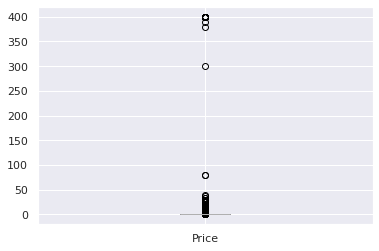

In [0]:
train.boxplot(column=['Price'])

Yes there are outliers in Price

In [0]:
train.loc[train['Price'] >= 200]

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4038,4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4191,4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4196,4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5046,5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5049,5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5050,5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5051,5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5052,5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5053,5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5054,5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [0]:
P_list = train.loc[train['Price'] >= 200].index

In [0]:
train = train.drop(P_list)

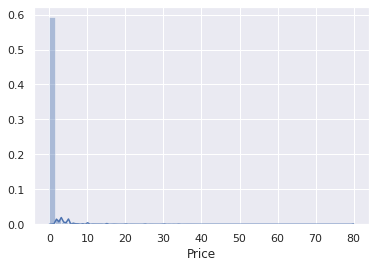

In [0]:
sns.distplot(train['Price'])

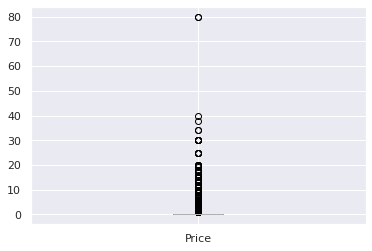

In [0]:
train.boxplot(column=['Price'])

In [0]:
train.loc[train['Price'] >= 30]

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2170,2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2215,2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2278,2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2314,2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2326,2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5055,5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [0]:
train = train.drop(train.loc[train['Price'] >= 30].index)

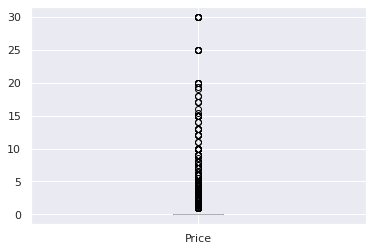

In [0]:
train.boxplot(column=['Price'])

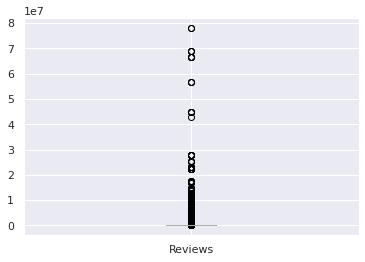

In [0]:
train.boxplot(column=['Reviews'])

In [0]:
R_list = train.loc[train['Reviews'] >= 1000000].index

In [0]:
train = train.drop(R_list)

In [0]:
train['Installs'].quantile(0.95)

10000000.0

In [0]:
percen = train['Installs'].quantile(0.95)

In [0]:
train.loc[train['Installs'] > percen]

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
136,143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
178,188,Indeed Job Search,BUSINESS,4.3,674730,21516.529524,50000000,Free,0.0,Everyone,Business,"May 21, 2018",Varies with device,Varies with device
182,192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,21516.529524,50000000,Free,0.0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
215,225,Secure Folder,BUSINESS,3.8,14760,8600.000000,50000000,Free,0.0,Everyone,Business,"January 31, 2018",1.1.07.6,7.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9066,10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27000.000000,50000000,Free,0.0,Teen,Action,"August 8, 2018",1.1.2,4.1 and up
9077,10429,Talking Tom Bubble Shooter,FAMILY,4.4,687136,54000.000000,50000000,Free,0.0,Everyone,Casual,"May 25, 2018",1.5.3.20,4.1 and up
9148,10513,Flight Simulator: Fly Plane 3D,FAMILY,4.0,660613,21000.000000,50000000,Free,0.0,Everyone,Simulation,"March 1, 2017",1.32,2.3 and up
9162,10549,Toy Truck Rally 3D,GAME,4.0,301895,25000.000000,50000000,Free,0.0,Everyone,Racing,"May 23, 2018",1.4.4,4.1 and up


In [0]:
l_percen = train.loc[train['Installs'] > percen].index

In [0]:
train = train.drop(l_percen) #dropping records having value more than 95th percentile

Task 5

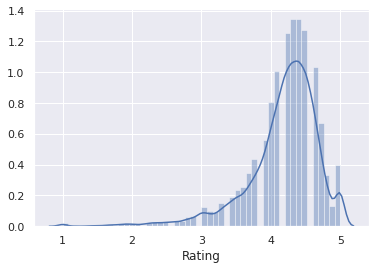

In [0]:
import seaborn as sns
sns.distplot(train['Rating'])

Rating is negatively skewed and it is deviated from normal distribution

This implies that more people tends to give high ratings

Task 6

In [0]:
train['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

the top content rating is Everyone, next to that is Teen

yes Unrated and adults only 18+ have very few records

In [0]:
train.loc[train['Content Rating'] == 'Adults only 18+']

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
287,298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4900.000000,500000,Free,0.0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
2904,3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41000.000000,1000000,Free,0.0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
5948,6424,Manga Books,COMICS,3.8,7326,21516.529524,500000,Free,0.0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device


In [0]:
l_adult = train.loc[train['Content Rating'] == 'Adults only 18+'].index

In [0]:
train = train.drop(l_adult)

In [0]:
train.loc[train['Content Rating'] == 'Unrated']

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7341,8266,DC Universe Online Map,TOOLS,4.1,1186,6400.0,50000,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [0]:
l_unrate = train.loc[train['Content Rating'] == 'Unrated'].index

In [0]:
train = train.drop(l_unrate)

Task 7

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


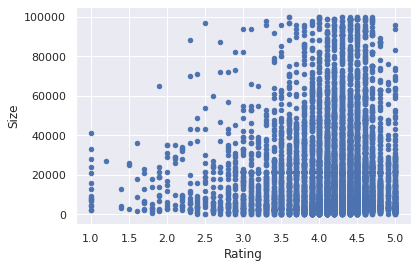

In [0]:
data = pd.concat([train['Rating'], train['Size']], axis=1)
data.plot.scatter(x='Rating', y='Size');

Yes there is a pattern, the rating increases with the increase in size

Task 8

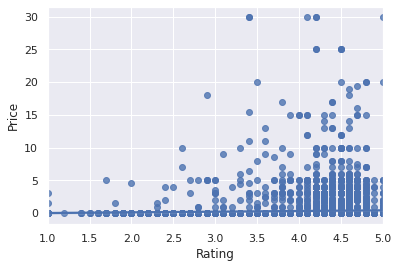

In [0]:
sns.set(color_codes=True)
sns.regplot(x="Rating", y="Price", data=train);

the pattern is somewhat negatively skewed

the regression line is constant at zero since most of the records are having Price zero though with the slight increase in price the rating increased but as the price increases more it doesnt have effect on rating. Seems more like outliers

In [0]:
d_train = train.loc[train['Price'] > 0]

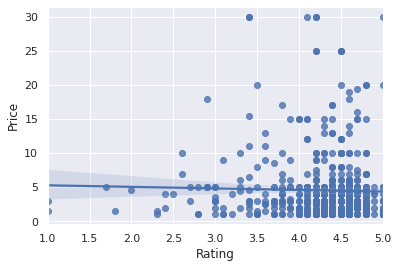

In [0]:
sns.set(color_codes=True)
sns.regplot(x="Rating", y="Price", data=d_train);

there is no change in pattern, now the regression line is constant at somewhere near price 5$

my overall inference is there is not much effect of price on rating

Task 9

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


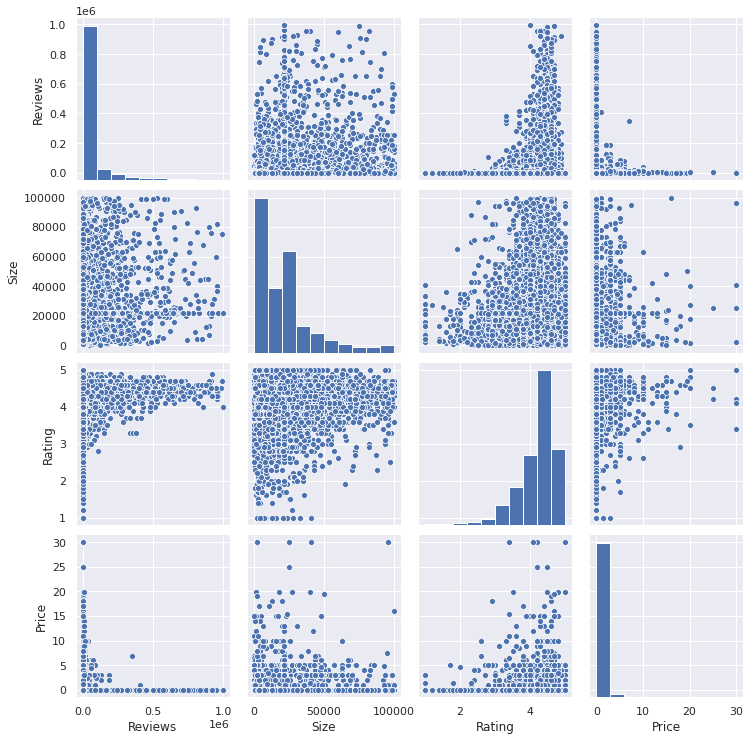

In [0]:
sns.set()
cols = ['Reviews', 'Size', 'Rating', 'Price']
sns.pairplot(train[cols], size = 2.5)

Task 10


In [0]:
train.head()


,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [0]:
## Check ratings column for quantifying it with mean, median or any other discretization format

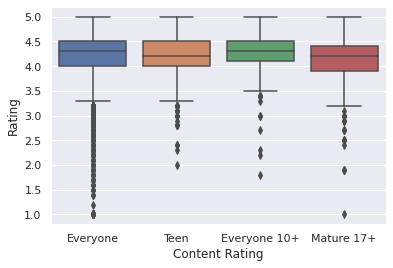

In [0]:
# Seaborn Box Plot

sns.boxplot(x='Content Rating', y='Rating', data=train)
            


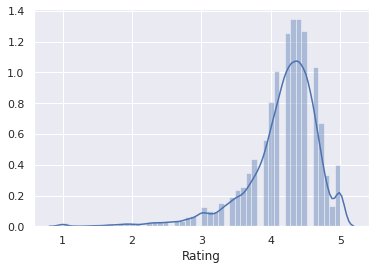

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
sns.distplot(train['Rating']);





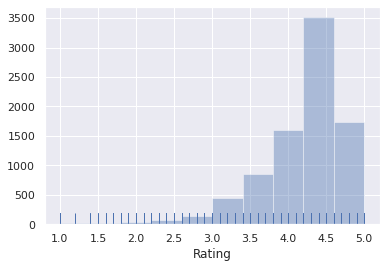

In [0]:
sns.distplot(train['Rating'], bins=10, kde=False, rug=True);

In [0]:
train['rating_binned']=pd.cut(train['Rating'], 5).astype(str)

In [0]:
pd.crosstab(train['rating_binned'], train['Content Rating'])

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
rating_binned,,,,
"(0.996, 1.8]",41,1,1,0
"(1.8, 2.6]",118,2,8,4
"(2.6, 3.4]",472,9,30,45
"(3.4, 4.2]",2534,144,208,413
"(4.2, 5.0]",3617,176,170,438


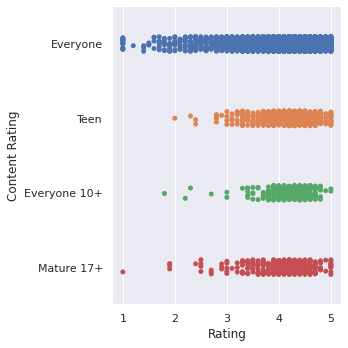

In [0]:
#Categorical scatterplots
 
sns.catplot(x="Rating", y="Content Rating", data=train)




Task 11 :
Content rating vs. size vs. rating – 3 variables at a time
a. Create 5 buckets (20% records in each) based on Size

In [0]:
train['bucketed_size']=pd.cut(train['Size'], 5).astype(str)
pd.crosstab(train['bucketed_size'], train['Content Rating'])


Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
bucketed_size,,,,
"(-91.492, 20006.8]",3899,82,189,366
"(20006.8, 40005.1]",2049,159,151,301
"(40005.1, 60003.4]",480,44,42,107
"(60003.4, 80001.7]",196,26,16,62
"(80001.7, 100000.0]",158,21,19,64


b.By Content Rating vs. Size buckets, get the rating (20th percentile) for each
combination

In [0]:
combination = train.groupby(['Content Rating', 'bucketed_size'])['Rating'].quantile([0.20]).unstack().reset_index()
combination

,Content Rating,bucketed_size,0.2
0,Everyone,"(-91.492, 20006.8]",3.80
1,Everyone,"(20006.8, 40005.1]",4.00
2,Everyone,"(40005.1, 60003.4]",3.90
3,Everyone,"(60003.4, 80001.7]",4.00
4,Everyone,"(80001.7, 100000.0]",4.04
5,Everyone 10+,"(-91.492, 20006.8]",4.02
6,Everyone 10+,"(20006.8, 40005.1]",4.00
7,Everyone 10+,"(40005.1, 60003.4]",4.06
8,Everyone 10+,"(60003.4, 80001.7]",4.00
9,Everyone 10+,"(80001.7, 100000.0]",4.10


Heatmap : Green



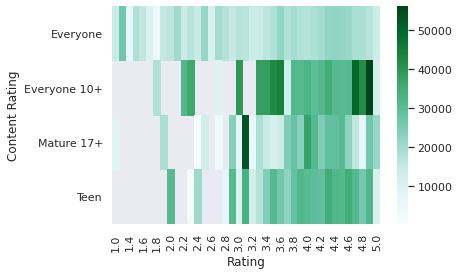

In [0]:
df2 = train[['Content Rating', 'Size', 'Rating','index']]
heatmap2_data = pd.pivot_table(df2,values='Size', index=['Content Rating'], columns='Rating')
#heatmap2_data.head(n=100)
sns.heatmap(heatmap2_data, cmap="BuGn")

In [0]:
train.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rating_binned,bucketed_size
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,"(3.4, 4.2]","(-91.492, 20006.8]"
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,"(3.4, 4.2]","(-91.492, 20006.8]"
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,"(4.2, 5.0]","(-91.492, 20006.8]"
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,"(4.2, 5.0]","(-91.492, 20006.8]"
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,"(4.2, 5.0]","(-91.492, 20006.8]"


Annotated heatmap

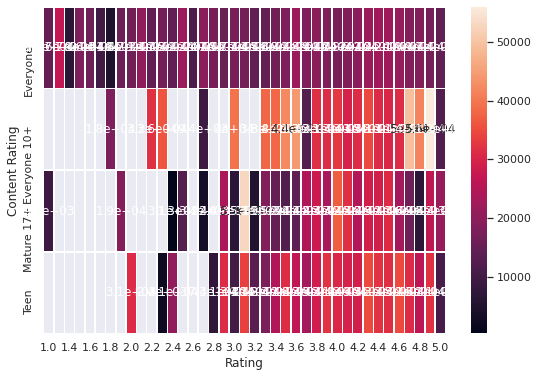

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and convert to long-form
#heatmap2_data = df2.pivot("Size", 'Content Rating', "Rating")

heatmap2_data = pd.pivot_table(df2,values='Size', index=['Content Rating'], columns='Rating')
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(heatmap2_data, annot=True,linewidths=.5, ax=ax)

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

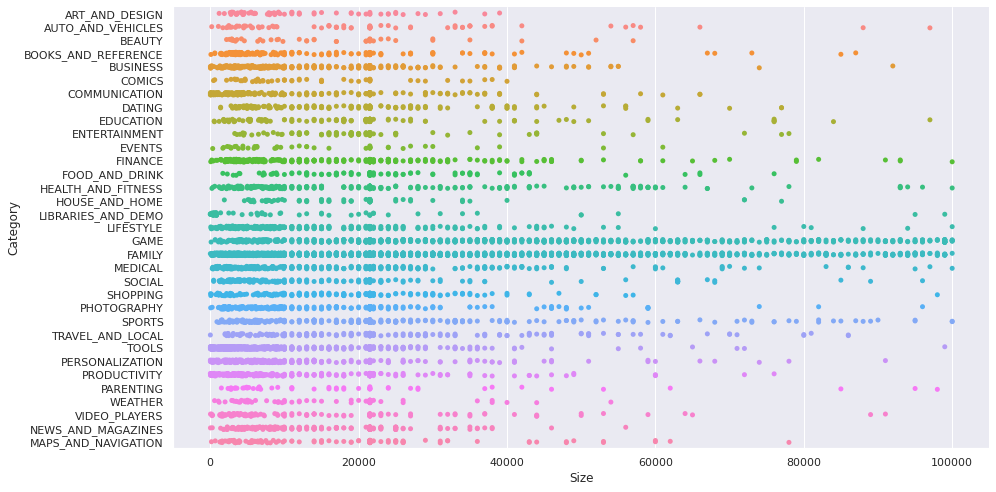

In [0]:
sns.catplot(x="Size", y="Category", data=train, height=7, aspect=2)




For Game ,Family, Health, Sports -  Heavier Apps are also considered
